$\color{cyan}{\textbf{Assignment 3 - Fisher Vectors}}$

Trabalho realizado por:

    Pedro Ferreira Nº2018285801
    Telmo Cunha Nº 2018308321

$\color{cyan}{\textbf{Imports}}$

In [14]:
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import math
import numpy.matlib
from random import randint

$\color{cyan}{\textbf{Get Encoding for .txt file}}$

In [15]:
%cd "Assign#2-category-recognition-HandCraft-CVC2021"

[WinError 2] O sistema não conseguiu localizar o ficheiro especificado: 'Assign#2-category-recognition-HandCraft-CVC2021'
c:\Users\pedro\OneDrive\Ambiente de Trabalho\CVC_assignment3\Assign#2-category-recognition-HandCraft-CVC2021


In [16]:
data = np.loadtxt("train_images_fv.txt") #file created by exercise2.m from assignment 2
img_data = np.transpose(data)

In [17]:
img_data = np.transpose(data)
img_data.shape

(9780, 20480)

$\color{cyan}{\textbf{Get labels}}$

In [18]:
flag = "age"

In [19]:
folderPath = "data/myImages"
files_paths = os.listdir(folderPath)
    
labels_origin = []

for i in range(len(files_paths)):
    filename = files_paths[i]
    x = filename.split("_")
    
    if len(x)<4 and flag.lower()=="gender":
        img_data = np.delete(img_data, i, axis=0)
        continue

    if flag.lower()=="age":
        labels_origin.append(int(x[0]))
    if flag.lower()=="gender":
        labels_origin.append(int(x[1]))


labels_origin = np.array(labels_origin)
np.unique(labels_origin)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  95,  96,  99, 100, 101, 110])

In [20]:
if flag.lower()=="age":
    max_age = np.max(labels_origin)
    N_classes_age = 10
    separation = math.ceil(max_age/N_classes_age)

    labels = []
    for i in range(len(labels_origin)):
        labels.append(int(math.floor((labels_origin[i]+1)/separation)))

    labels = np.array(labels)
    print(np.unique(labels))
else:
    labels = labels_origin

[ 0  1  2  3  4  5  6  7  8  9 10]


In [21]:
classes = np.unique(labels)
print("Classes:", classes)
for i in range(len(classes)):
    Classe_N = sum((labels==classes[i]).astype('int'))

    print("Class", i , "has" ,Classe_N, "samples.")
    if Classe_N<100:
        indexs = np.array(np.where(labels==classes[i])).ravel()
        labels = np.delete(labels, indexs, 0)
        img_data = np.delete(img_data, indexs, 0)

print(np.unique(labels))

Classes: [ 0  1  2  3  4  5  6  7  8  9 10]
Class 0 has 2946 samples.
Class 1 has 1321 samples.
Class 2 has 1620 samples.
Class 3 has 1053 samples.
Class 4 has 883 samples.
Class 5 has 844 samples.
Class 6 has 596 samples.
Class 7 has 381 samples.
Class 8 has 129 samples.
Class 9 has 5 samples.
Class 10 has 2 samples.
[0 1 2 3 4 5 6 7 8]


$\color{cyan}{\textbf{Verifying the data}}$

In [22]:
# introspect the images arrays to find the shapes (for plotting)
n_samples = len(labels) 

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = img_data

# the label to predict is the id of the person
y = labels
n_classes =len(np.unique(y))

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % img_data.shape[1])
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 9773
n_features: 20480
n_classes: 9


In [23]:
#Get class names for plotting
target_names = []
c_class = np.unique(labels)
genders = ["Male","Female"]

if flag.lower()=="age":
    dist = 10
    for i in range(len(np.unique(labels))):
        target_names.append(str(dist*c_class[i])+"-"+str(dist*c_class[i]+dist-1))
else:
    for i in range(len(np.unique(labels))):
        target_names.append(genders[i])

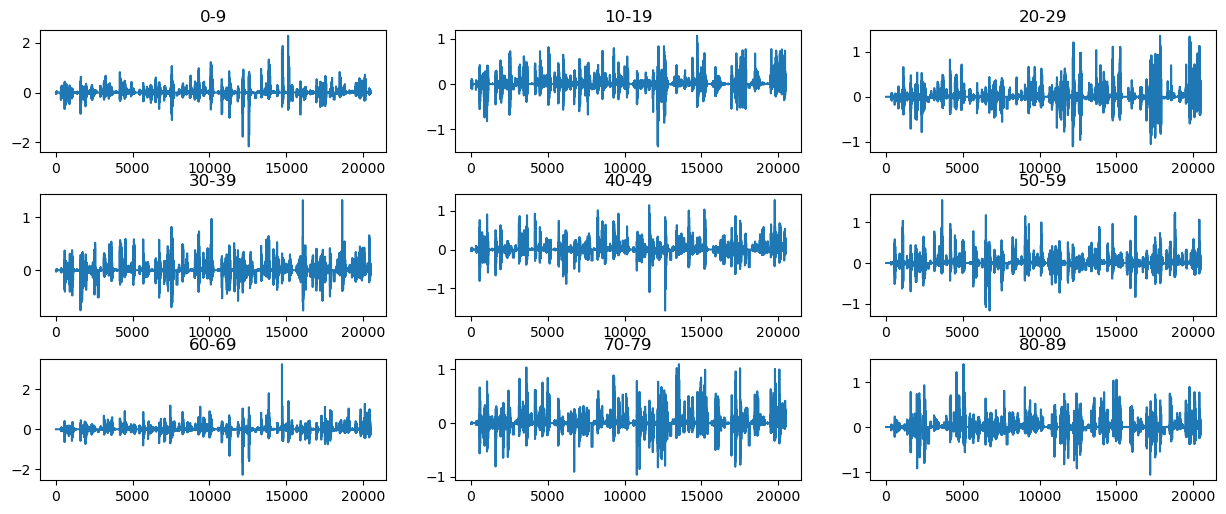

In [24]:
classes = np.unique(labels)
counter = -1

plt.figure(figsize=(12,5))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)

if len(classes)>4:
    n_rows = math.ceil(len(classes)/4)
else:
    n_rows = 1

if len(classes)>4:
    n_columns = math.ceil(len(classes)/3)
else:
    n_columns = len(classes)

for i in range(len(img_data)):
    if counter==-1 and classes[0]==labels[i]:
        plt.subplot(n_rows, n_columns, counter+2)
        plt.plot(img_data[i,:])
        plt.title(target_names[counter+1])
        counter=counter+1
    else:
        if labels[i]!=classes[counter]:
            plt.subplot(n_rows, n_columns, counter+2)
            plt.plot(img_data[i,:])
            plt.title(target_names[counter+1])
            counter=counter+1

        if counter==len(classes)-1:
            break

plt.show()

$\color{cyan}{\textbf{Split the Dataset}}$

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

$\color{cyan}{\textbf{Fitting the data}}$

In [26]:
print("Fitting the classifier to the training set")
t0 = time()

clf = SVC(kernel="linear", class_weight="balanced", C=10)

clf = clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))

Fitting the classifier to the training set
done in 259.280s


$\color{cyan}{\textbf{Getting performance measurements on the training data}}$

Predicting on the training set
done in 227.978s
              precision    recall  f1-score   support

         0-9       1.00      1.00      1.00      2211
       10-19       0.99      1.00      1.00       985
       20-29       1.00      1.00      1.00      1211
       30-39       1.00      1.00      1.00       788
       40-49       1.00      1.00      1.00       678
       50-59       1.00      1.00      1.00       630
       60-69       1.00      1.00      1.00       441
       70-79       1.00      1.00      1.00       290
       80-89       1.00      1.00      1.00        95

    accuracy                           1.00      7329
   macro avg       1.00      1.00      1.00      7329
weighted avg       1.00      1.00      1.00      7329

Mean Precision: 0.997921983698985
Mean F1-Score: 0.9982860053689474
Mean Recall: 0.9986546556860767


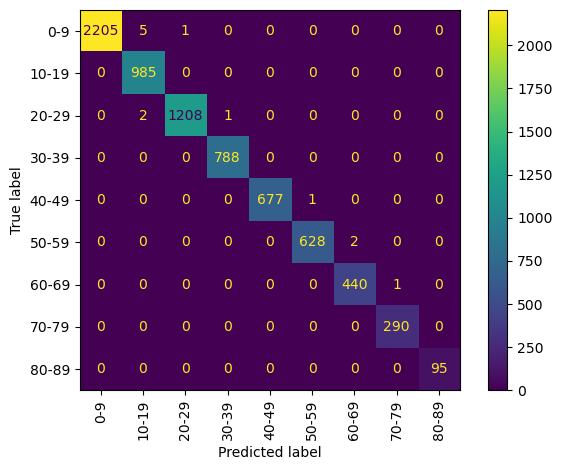

In [27]:
print("Predicting on the training set")
t0 = time()
y_pred = clf.predict(X_train)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_train, y_pred, target_names=target_names))
print("Mean Precision: "+str(precision_score(y_train, y_pred, average='macro')))
print("Mean F1-Score: "+str(f1_score(y_train, y_pred, average='macro')))
print("Mean Recall: "+str(recall_score(y_train, y_pred, average='macro')))

ConfusionMatrixDisplay.from_estimator(
    clf, X_train, y_train, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

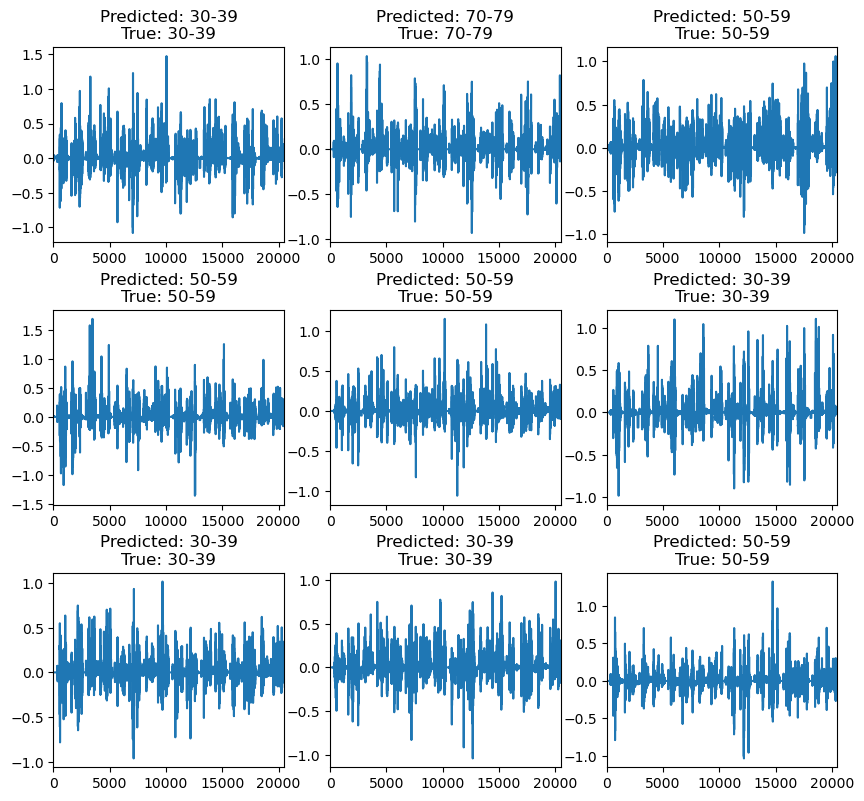

In [28]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)

for i in range(1,10):
    plt.subplot(3, 3, i)
    plt.plot(X_train[i,:])
    plt.xlim(0,len(X_train[i,:]))
    plt.title("Predicted: "+target_names[y_pred[i]]+"\nTrue: "+target_names[y_train[i]])

plt.show()

$\color{cyan}{\textbf{Getting performance measurements on the test data}}$

Predicting on the test set
done in 76.342s
              precision    recall  f1-score   support

         0-9       0.88      0.91      0.90       735
       10-19       0.59      0.62      0.61       336
       20-29       0.58      0.56      0.57       409
       30-39       0.40      0.46      0.43       265
       40-49       0.38      0.39      0.38       205
       50-59       0.42      0.35      0.38       214
       60-69       0.44      0.35      0.39       155
       70-79       0.47      0.51      0.49        91
       80-89       0.38      0.18      0.24        34

    accuracy                           0.61      2444
   macro avg       0.50      0.48      0.49      2444
weighted avg       0.61      0.61      0.61      2444

Mean Precision: 0.5036824037111314
Mean F1-Score: 0.4871353386766418
Mean Recall: 0.4810740292091176


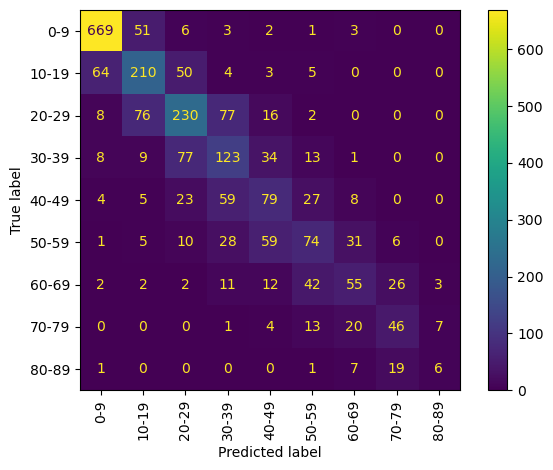

In [29]:
print("Predicting on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print("Mean Precision: "+str(precision_score(y_test, y_pred, average='macro')))
print("Mean F1-Score: "+str(f1_score(y_test, y_pred, average='macro')))
print("Mean Recall: "+str(recall_score(y_test, y_pred, average='macro')))


ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

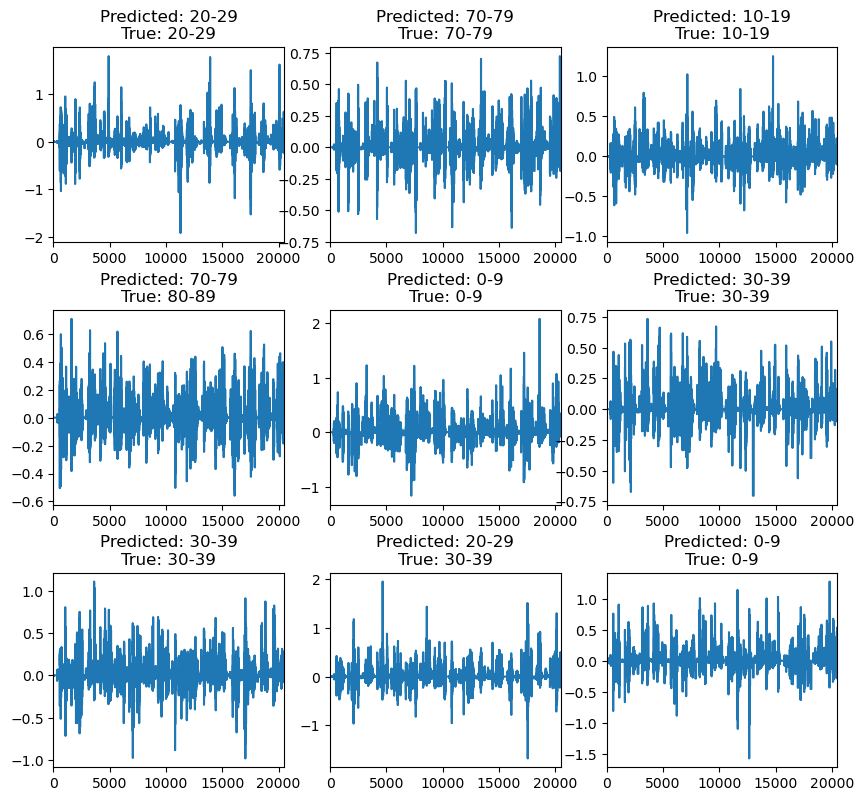

In [30]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)

for i in range(1,10):
    plt.subplot(3, 3, i)
    plt.plot(X_test[i,:])
    plt.xlim(0,len(X_test[i,:]))
    plt.title("Predicted: "+target_names[y_pred[i]]+"\nTrue: "+target_names[y_test[i]])

plt.show()